<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carolina Barba Anaya e Iván Andrés Arellano Ruelas.

**Fecha:** 10 de Octubre del 2021.

**Expediente** : if720071 y im714383.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Carolina1002/ProyectoConjunto_CBarba_IArellano.git

# Tarea 6: Clase 10

In [1]:
# Librerias 
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
# %matplotlib notebook
%matplotlib inline

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.




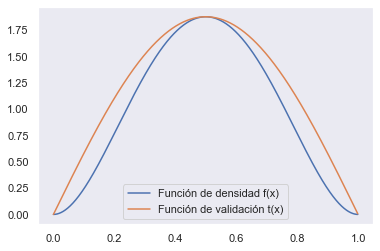

In [2]:
# Código Carolina 
def fun_den(f, t, N):
    x = np.arange(0, 1, 1 / N)
    plt.figure()
    plt.plot(x, f(x), label = "Función de densidad f(x)")
    plt.plot(x, t(x), label = "Función de validación t(x)")
    plt.grid()
    plt.legend()
    plt.show() 
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4) 
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp = False)) 
t = lambda x: max_f * np.sin(np.pi * x) 
N = 1000 
fun_den(f, t, N)

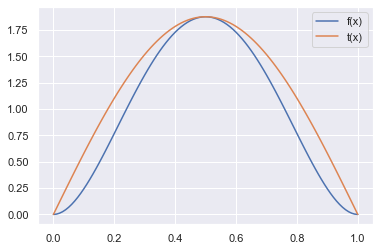

In [3]:
# Codigo Iván 
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
# Con la ayuda de la librería optimize maximizamos f
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
#Genero una función cosntante a * Sin(pi*x) 
t = lambda x: max_f * np.sin(np.pi*x)
# El seno sabemos que osila entre 0 y 1 usamos ese rango 
x = np.arange(0,1.01,0.01)
# Genero Gráfica
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

### Código Carolina 


Obtener el valor de C realizando la integral de 0 a 1:

$c = \int_{\infty}^{\infty}{t(x)dx}$ <br />
<br />
$$c =\int_{0}^{1}t(x)dx = \int_{0}^{1} asin(\pi x) dx = \frac{-a}{\pi}[cos(\pi x)]_{0}^{1} = \frac{2a}{\pi}$$

Sustituimos C para obtener $g(x)$:$$g(x) = \frac{t(x)}{c} = \frac{\frac{asin(\pi x)}{1}}{\frac{2a}{\pi}} = \frac{\pi sin(\pi x)}{2} $$

Simplificamos: <br />
<br />
$g(x) = \frac{\pi}{2}\sin{\pi x}$

### Codigo Iván 

$c = \int_{\infty}^{\infty}{t(x)dx}$ <br />
<br />
Por el método visto en clase sabemos que tenemos que realizar la integral de 0 a 1 <br />
<br />
y que $t(x) = a\sin{\pi x}$<br />
<br />
**entonces:** <br />
<br />
$c = \int_{0}^{1}{asin(\pi x)dx} = \frac{2a}{\pi}$ <br />
<br />
 Recordando: $\frac{f(x)}{g(x)}\leq c$<br />
<br />
**LLegamos a:**<br />
<br />
g(x) = $\frac{t(x)}{c}$ = $\frac{a\sin{\pi x}}{\frac{2a}{\pi}}$<br />
<br />
**Simplificando tenemos que g(x)=**<br />
<br />
$g(x) = \frac{\pi}{2}\sin{\pi x}$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

### Código Carolina 

Integramos $g(x)$ para obtener $G(x)$, aplicamos el método de la transformada inversa, igualamos a U y despejamos para x:$$G(x) = \int_{0}^{x}g(x) = \int_{0}^{x}\frac{\pi}{2}sin(\pi x) = -\frac{1}{2}[cos(\pi x)]_{0}^{x}$$$$ G(x) = -\frac{1}{2}cos(\pi x) + \frac{1}{2}$$

$$ G(x) = -\frac{1}{2}cos(\pi x) + \frac{1}{2}$$$$ U = -\frac{1}{2}cos(\pi x) + \frac{1}{2}$$$$ -2U + 1 = cos(\pi x) $$$$ x = \frac{cos^{-1}(-2U +1)}{\pi}$$

### Codigo Iván 
**Recodando**<br />
<br />
$G(x) = \int{g(x)dx}$<br />
<br />
$G(x) = \int_{0}^{x}{g(x)dx}$<br />
<br />
$G(x) = \int_{0}^{1}{\frac{\pi}{x}\sin({\pi x})}dx$<br />
<br />
**Igualandolo a U**<br />
<br />
$\frac{1-\cos(\pi x)}{2} = U$<br />
<br />
**Resolviendo: (Despejando para x)**<br />
<br />
$x =\frac{\cos ^{-1}(-2U+1)}{\pi}$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
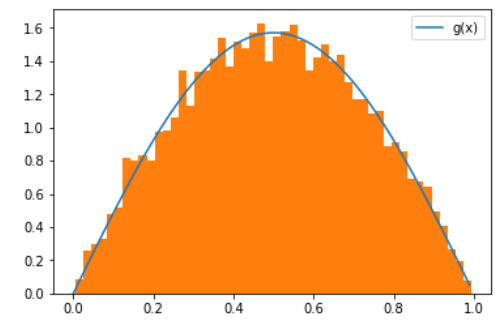

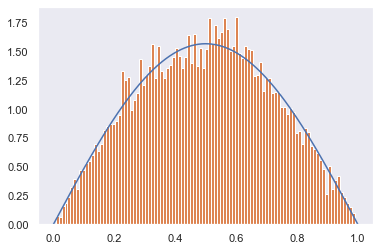

In [4]:
# Código Carolina 
def fun_dis(g, g_inv, N):
    va = np.random.rand(N) 
    g_a = g_inv(va) 
    x = np.arange(0, 1, (1 / N)) 
    g_d = g(x) 
    plt.figure() 
    plt.plot(x, g_d)
    plt.hist(g_a, bins = 100, density = True)
    plt.grid()
    plt.show()
g = lambda x: (np.pi / 2) * (np.sin(np.pi * x)) 
g_inv = lambda u: ((np.arccos(1 - 2 * u)) / np.pi) 
N = 10000 
fun_dis(g, g_inv, N) 


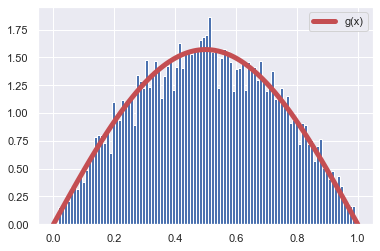

In [5]:
# Codigo Iván 
def dist_deseada(N):
    '''
    Con esta función generamos para N valores
    la distribucción que se propuso en el 
    ejercicio anterior 
    '''
    a = (np.arccos(-2*np.random.uniform(0,1,N)+1)/np.pi)
    return a 
b = lambda x:(np.pi/2)*np.sin(np.pi*x)
# Prueba 
N=10000
c = dist_deseada(N)
# Gráfica 
plt.hist(c,100,density=True)
plt.plot(x,b(x),'r',lw=5,label = 'g(x)')
plt.legend();


5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
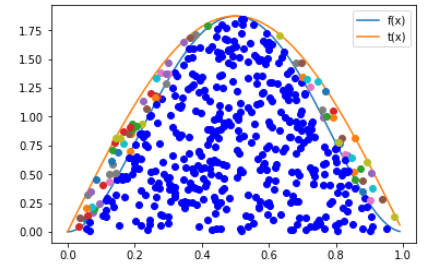

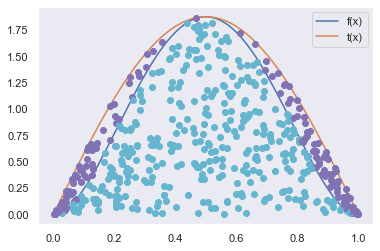

In [6]:
# Código Carolina 
def fun_a_r(R2, R1, f, t, N):
    fx = f(R1) 
    tx = t(R1)
    condition = R2 * tx <= fx  
    x = np.arange(0, 1, 1 / N) 
    plt.figure()
    plt.plot(x, f(x), label = "f(x)") 
    plt.plot(x, t(x), label = "t(x)") 
    [plt.plot(R1[i], R2[i] * tx[i], "oc") if condition[i] else plt.plot(R1[i], R2[i] * tx[i], "om") for i in range(len(R1))]
    plt.grid()
    plt.legend()
    plt.show()
N = 500 
f = lambda x: 30*(x**2 - 2 * x**3 + x**4) 
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp = False)) 
t = lambda x: max_f * np.sin(np.pi * x) 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 
fun_a_r(R2, R1, f, t, N) 


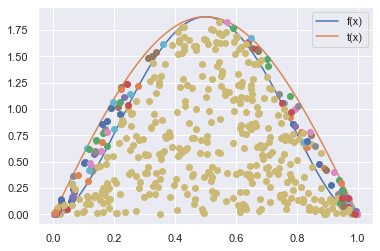

In [7]:
# Codigo Iván 
def acep_rech(R2:'Variables distruidas U~U(0,1)',
            R1:'Variables distribuidas como g(x)',
            f:'función objetivo a generar',
            t:'función que mayora a f'):
    '''
    Replico la función vista en clase, clasificando 
    si el valor esta dentro o fuera de los limites definidos
    '''
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    '''    
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'oy') 
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    return plt.show()
    Aplicando compresion de listas:
    '''
    [plt.plot(R1[i],R2[i]*t_x[i],'oy') if condition[i] 
      else plt.plot(R1[i],R2[i]*t_x[i],'o') for i in range(len(R1))]
    return plt.show()    
# Plot de f(x) y g(x):
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
t = lambda x: max_f * np.sin(np.pi*x)
x = np.arange(0,1.01,0.01)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()   
R2 = np.random.rand(500)
R1 = np.random.rand(500)
acep_rech(R2, R1, f, t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

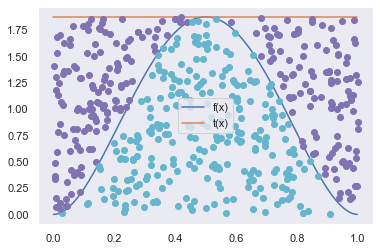

In [8]:
# Código Carolina 
def pacep_c_s(R2, R1, f, t):
    fx = f(R1)
    tx = t(R1)
    condition = R2 * tx <= fx 
    return [R1[i] for i in range(len(R1)) if condition[i]]
N = 500 
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4) 
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp = False)) 
t_c = lambda x: max_f * np.ones(len(x)) 
t_s = lambda x: max_f * np.sin(np.pi * x) 
R2 = np.random.rand(N) 
R1 = np.random.rand(N) 
fun_a_r(R2, R1, f, t_c, N) 
prob_tc = len(pacep_c_s(R2, R1, f, t_c)) / N
prob_sen = len(pacep_c_s(R2, R1, f, t_s)) / N

In [9]:
print("El porcentaje cuando t(x) es constante es de ",prob_tc * 100, "%")
print("El porcentaje cuando t(x) es senoidal es de ",prob_sen * 100, "%")

El porcentaje cuando t(x) es constante es de  50.4 %
El porcentaje cuando t(x) es senoidal es de  67.4 %


In [10]:
# Codigo Iván 
def acep_rech2(R2:'Variables distruidas U~U(0,1)',
            R1:'Variables distribuidas como g(x)',
            f:'función objetivo a generar',
            t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    a =[R1[i] for i in range(len(R1)) if condition[i]]
    return a
# Plot de f(x) y g(x):
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
# Con la ayuda de la librería optimize maximizamos f
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp=False))

x = np.arange(0,1.01,0.01)
N = 1000
R2 = np.random.rand(N)
R1 = np.random.rand(N)

# creo una constante y sen
cons = lambda x: max_f * np.ones(len(x))
sin = lambda x: max_f*np.sin(x*np.pi) 

# Meto cada una a una función 
c = acep_rech2(R2,R1,f,cons)
s = acep_rech2(R2,R1,f,sin)
c_porcentaje =len(c)/N
s_porcentaje = len(s)/N

In [11]:
(f'El porcentaje cuando t(x) es constante: {c_porcentaje}')

'El porcentaje cuando t(x) es constante: 0.53'

In [12]:
(f'El porcentaje cuando t(x) es senoidal: {s_porcentaje}') 

'El porcentaje cuando t(x) es senoidal: 0.702'

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo


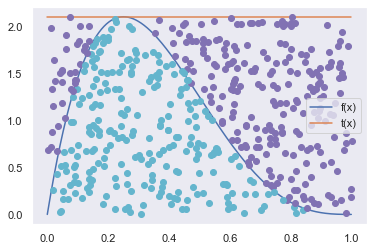

In [14]:
# Código Carolina 
f = lambda x: 20 * x * (1-  x)**3 
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp = False)) 
t_c = lambda x: max_f * np.ones(len(x)) 
N = 500 
R2 = np.random.rand(N) 
R1 = np.random.rand(N) 
fun_a_r(R2, R1, f, t_c, N) 

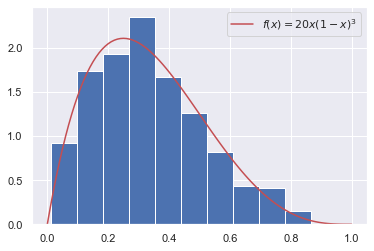

In [21]:
x_grid = np.arange(0, 1, 100)
plt.figure()
plt.plot(x, f(x), color = "r", label = "$f(x) = 20x (1 - x)^3$")
y,x_n, _ = plt.hist(pacep_c_s(R2, R1, f, t_c), bins = 10, density = True)
plt.legend()
plt.show()

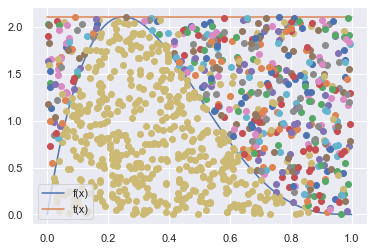

In [22]:
# Código Iván
# Para este ejercicio voy a combinar las dos
# funciones definidas anteriormente en 1 sola 
def acep_rech2(R2:'Variables distruidas U~U(0,1)',
            R1:'Variables distribuidas como g(x)',
            f:'función objetivo a generar',
            t:'función que mayora a f'):
    '''
    Replico la función vista en clase, clasificando 
    si el valor esta dentro o fuera de los limites definidos
    '''
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'oy') if condition[i] 
      else plt.plot(R1[i],R2[i]*t_x[i],'o') for i in range(len(R1))] 
    a =[R1[i] for i in range(len(R1)) if condition[i]]
    
    return plt.show()
    
# Plot de f(x) y g(x)
# Ahora con la nueva f(x)
f = lambda x: 20*x*(1-x)**3
# Con la ayuda de la librería optimize maximizamos f
max_f = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
# Para la linea recta
t = lambda x: max_f * np.ones(len(x))
x = np.arange(0,1.01,0.01)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();   
R2 = np.random.rand(1000)
R1 = np.random.rand(1000)
acep_rech2(R2, R1, f, t)

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$


### Código Carolina 

Se divide

$\frac{p_{i+1}}{p_i}$

Simplificamos con la propiedad del factorial

$\frac{n!}{(n+1)!} = \frac{1}{n+1}$.

$\frac{p_{i+1}}{p_i} = \frac{n!p^ip(1-p)^ni!(n-i)!(1-p)^i}{(1-p)^i(1-p)(i+1)!(n-i+1)!n!p^i(1-p)^n}$

$\frac{p_{i+1}}{p_i} =\frac{(n-i)p}{(i+1)(1-p)}$

Obtenemos 

$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$

### Código Iván
**Tenemos:**<br />
<br />
$P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$<br />
<br />

$p_{i+1}  = \frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}$ <br />
<br />
**Elimino Factoriales**<br />
<br />
$ \frac{\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}} = \frac {(n-i)p}{(1+i)(1-p)}p_i $ <br />
<br />
**Entonces demostramos::**<br />
<br />
$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

### Código Carolina

$$ P(k+1) = \frac{\lambda}{k+1}P(k)$$

$$k! = k(1+k)!$$

$$ \frac{k!}{(k+1)!} = \frac{1}{k+1}$$

$$P(k+1) = \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}}$$

$$P(k+1) = \frac{\lambda}{(k+1)}P(k)$$

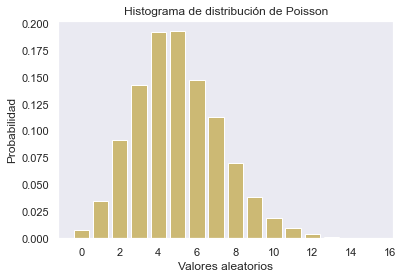

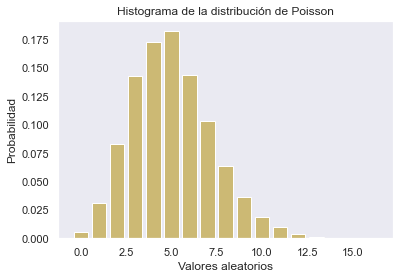

In [25]:
# Código Carolina
def dist_poisson(l, k):
    prob = np.zeros(k) 
    prob[0] = np.exp(-l) 
    def llenar_vector(i):
        nonlocal prob
        prob[i + 1] = (l * prob[i]) / (i + 1)
    [llenar_vector(i) for i in range(k - 1)] 
    return np.cumsum(prob)
def dist_discreta(p_acum, k):
    x = np.random.rand(k) 
    y = pd.Series([sum([1 for p in p_acum if p < xi]) for xi in x]) 
    return y
def hist_discreto(dist, title):
    plt.figure()
    y, x = np.histogram(dist, bins = len(set(dist)), density = True) 
    plt.bar(list(set(dist)), y, color = "y")
    plt.xlabel("Valores aleatorios")
    plt.ylabel("Probabilidad")
    plt.title(title)
    plt.grid()
    plt.show()
k, l = 10000, 5 
p_acum = dist_poisson(l, k) 
# Usando transformada inversa
d_poisson_t = dist_discreta(p_acum, k)
hist_discreto(d_poisson_t, "Histograma de distribución de Poisson")
# Usando numpy
d_poisson_np = np.random.poisson(l, k)
hist_discreto(d_poisson_np, "Histograma de la distribución de Poisson")

### Código Iván
$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$<br />
<br />
$P(k)=\frac{e^{-\lambda}(\lambda)^k}{k!}$<br />
<br />
$\frac{P(k+1)}{P(k)}=\frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}} $<br />
<br />
$P(k+1)=\frac{e^{-\lambda}\lambda^k\lambda}{(k+1)k!} $<br />
<br />
$P(k+1)=\frac{\lambda}{k+1}P(k)$

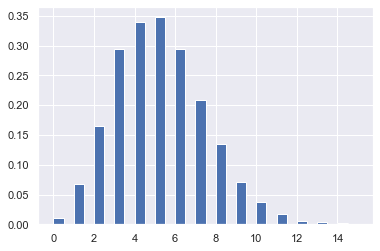

In [26]:
# Código Iván 
def posson(k,l):
    global Mi_vector
    Mi_vector = np.zeros(k)
    Mi_vector[0] = np.exp(-l)
    def mi_vectori(i):
        Mi_vector[i+1]=l/(i+1)*Mi_vector[i]
    [mi_vectori(i) for i in range(k-1)]
    return np.cumsum(Mi_vector)

U = np.random.rand(10000)
a = posson(20,5)
distri = list(map(lambda x:sum(1 for i in a if i<U[x]),range(10000)))
plt.hist(distri,30,density=True);
              

Para comprar mi resultado utilizare la libreria scipy.stats.

In [27]:
import scipy.stats as stats

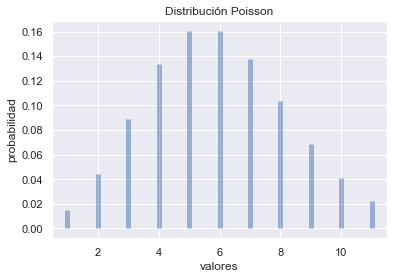

In [28]:
# Graficando Poisson
mu =6 # parametro de forma 
poisson = stats.poisson(mu,) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()